# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Завантаження даних
data = pd.read_csv('D:/DATAS/Python/data/Модуль 16/House_Rent_Dataset.csv', sep=None, engine='python')

# Розмір датасету
data.shape

(4746, 12)

In [3]:
# Перші 5 рядків даних
data.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
# Загальна інформація про дані
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
# Перевірка кількості дублікатів
print("Кількість дублікатів:", data.duplicated().sum())

Кількість дублікатів: 0


## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [6]:
# Аналіз пропущених значень
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100

missing_percent

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

Результат хороший, бо пропущені значення відсутні.

In [7]:
# Базова статистика
stats = data[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


**Висновки:**

*BHK (кількість кімнат):*
- Середнє - 2.08, більшість квартир мають 2-3 кімнати.
- Мінімум - 1, максимум - 6.
- Розподіл досить компактний (std - 0.83).

*Rent (орендна плата, це цільова змінна):*
- Середнє - 34 993.45, але стандартне відхилення дуже велике - 78 106.
- Мінімум - 1 200, максимум - 3 500 000 - дуже велике значення, це викид.
- Медіана - 16 000, тобто більшість квартир дешевші за середнє.

*Size (площа, кв. футів):*
- Середнє - 967, медіана - 850.
- Мінімум - 10 **(можливо помилка, бо схоже на некоректні дані)**, максимум - 8 000.
- Стандартне відхилення теж велике - 634.

*Bathroom (кількість ванних кімнат):*
- Середнє - 1.97, медіана - 2.
- Мінімум - 1, максимум - 10 **(теж запис схожий на помилку, бо максимальна кількість кімнат 6)**.
- Більшість квартир мають 1-2 ванні кімнати.

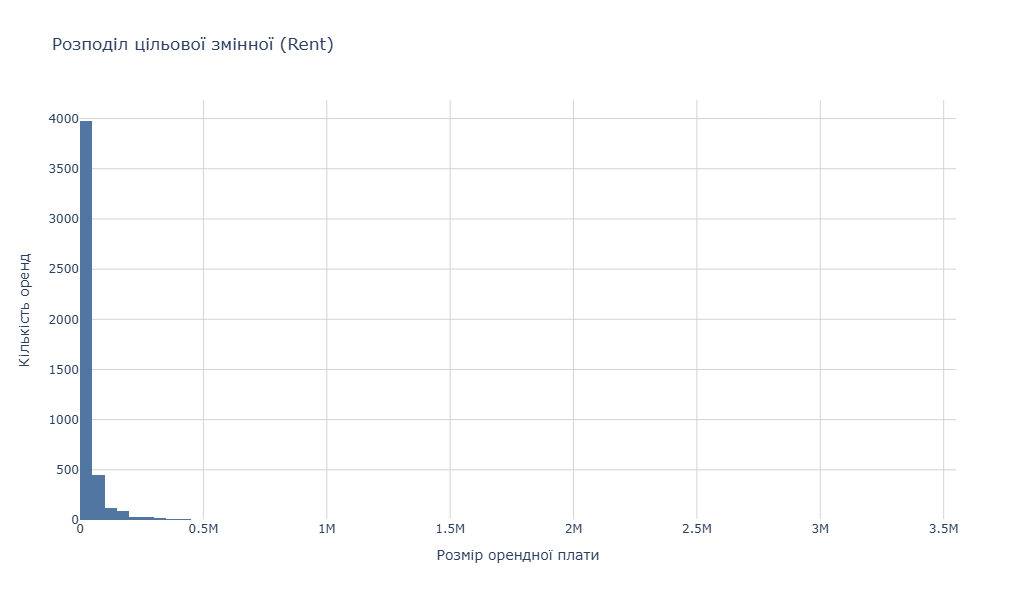

In [9]:
# Гістограма розподілу цільової змінної (Rent)
fig = px.histogram(
    data,
    x='Rent',
    nbins=150,
    title='Розподіл цільової змінної (Rent)',
    labels={'Rent': 'Розмір орендної плати'},
    color_discrete_sequence=['#5176A1']
)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis_title='Кількість оренд',
    height=600
)
fig.show()

Розподіл сильно правосторонній, основна маса значень знаходиться в діапазоні від 0 до 50 000. Графік підтверджує попередню статистику і очевидними є викиди в розмірі орендної плати, зокрема, максимальне значення - 3 500 000.

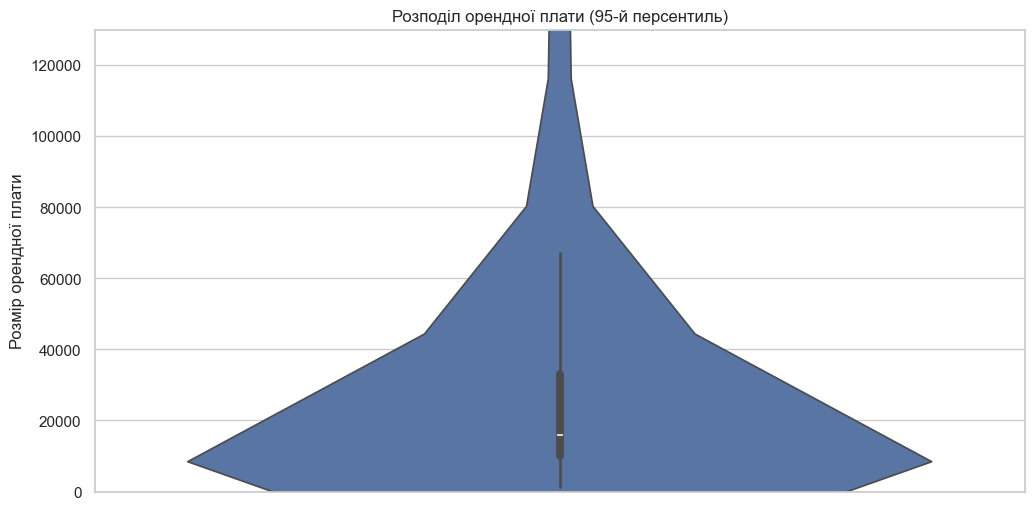

In [10]:
# Boxplot ДО видалення викидів
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.violinplot(data=data, y='Rent', inner="box")

# Вісь Y обмежена, щоб побачити краще box-plot, але дані виходять за межі
plt.ylim(0, data['Rent'].quantile(0.95)) 
plt.title('Розподіл орендної плати (95-й персентиль)')
plt.ylabel('Розмір орендної плати')
plt.show()

Зображений розподіл на цій комбінованій діаграмі є нагляднішим і дуже чітко відображає розташування значень, які ми рахували в межах базової статистики: 25 персентиль відповідає значенню - 10 000, медіана - 16 000 і т.ін.).

In [11]:
# Для роботи з викидами використовую метод IQR (Interquartile Range)
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Викиди
outliers = data[(data['Rent'] < lower_bound) | (data['Rent'] > upper_bound)]
print("Кількість викидів:", len(outliers))

# Видалення викидів
data_clean = data[(data['Rent'] >= lower_bound) & (data['Rent'] <= upper_bound)].copy()

# Результат і перевірка видаленого
print(f"Початкова кількість записів: {len(data)}")
print(f"Кількість після видалення викидів: {len(data_clean)}")

Кількість викидів: 520
Початкова кількість записів: 4746
Кількість після видалення викидів: 4226


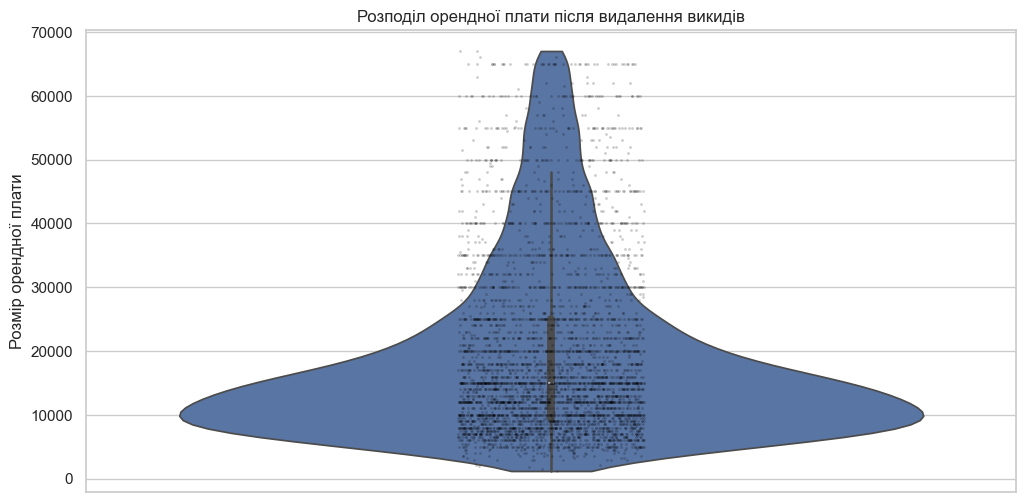

In [12]:
# Boxplot ПІСЛЯ видалення викидів
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_clean, y='Rent', inner="box", cut=0)

# Щоб побачити кожну окрему точку даних
sns.stripplot(data=data_clean, y='Rent', color="black", size=2, alpha=0.2)

plt.title('Розподіл орендної плати після видалення викидів')
plt.ylabel('Розмір орендної плати')
plt.show()

In [13]:
# Аналіз категоріальних змінних
categorical_cols = data_clean.select_dtypes(include=['object', 'category']).columns
unique_counts = data_clean[categorical_cols].nunique()

print(unique_counts)

Posted On              80
Floor                 340
Area Type               3
Area Locality        1997
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


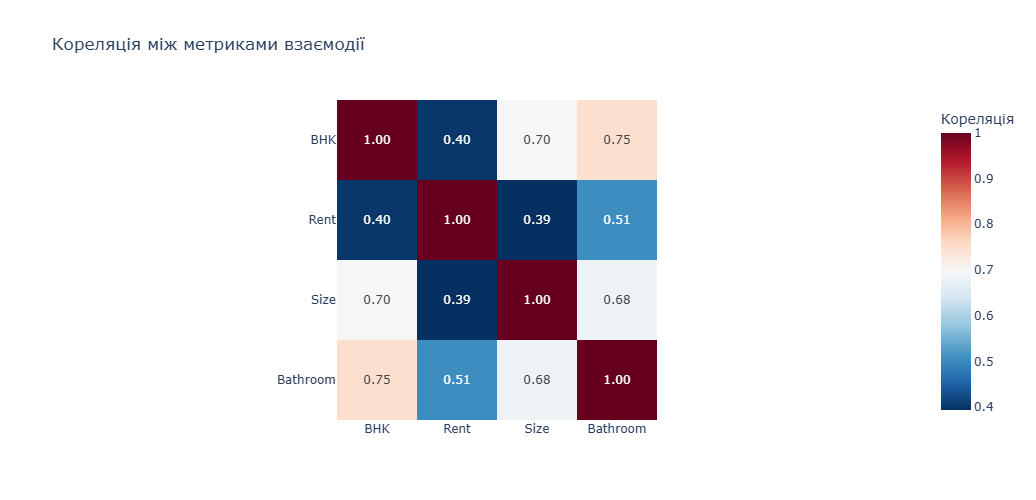

In [14]:
# Датафрейм тільки з числовими змінними
metrics_df = data_clean[['BHK', 'Rent', 'Size', 'Bathroom']].dropna()

# Матриця кореляцій
correlation_matrix = metrics_df.corr()

# Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()

**Висновок щодо кореляції між змінними:**

1. Найпомітніша кореляція між змінними *ВНК* та *Bathroom* - 0,75, тобто чим більша кількість кімнат, тим більше кількість санвузлів. Та між змінними *ВНК* та *Size* - 0,70, що логічно, бо чим більша кількість кімнат, тим більша і площа квартири.
2. Найменша кореляція між змінними *Rent* та *Size* - 0,39 - це показує, що в цих даних не надто сильний зв'язок між розміром квартири та її ціною. Також помірна кореляція між *Rent* та *ВНК* - 0,40, що означає, що величина оренди не сильно залежить від кількості кімнат у квартирі.
3. Навіть більше можна спостерігати кореляцію між *Rent* та *Bathroom* - 0,51, що показує, що в більшій мірі величина оренди залежить від кількості ванних кімнат, ніж від кількості кімнат в квартирі взагалі.

В цьому наборі даних більша кореляція між параметрами самої квартири, але слабка кореляція з ціною. Тому скоріше за все, мають більший вплив категоріальні показники, яких немає в цій таблиці.

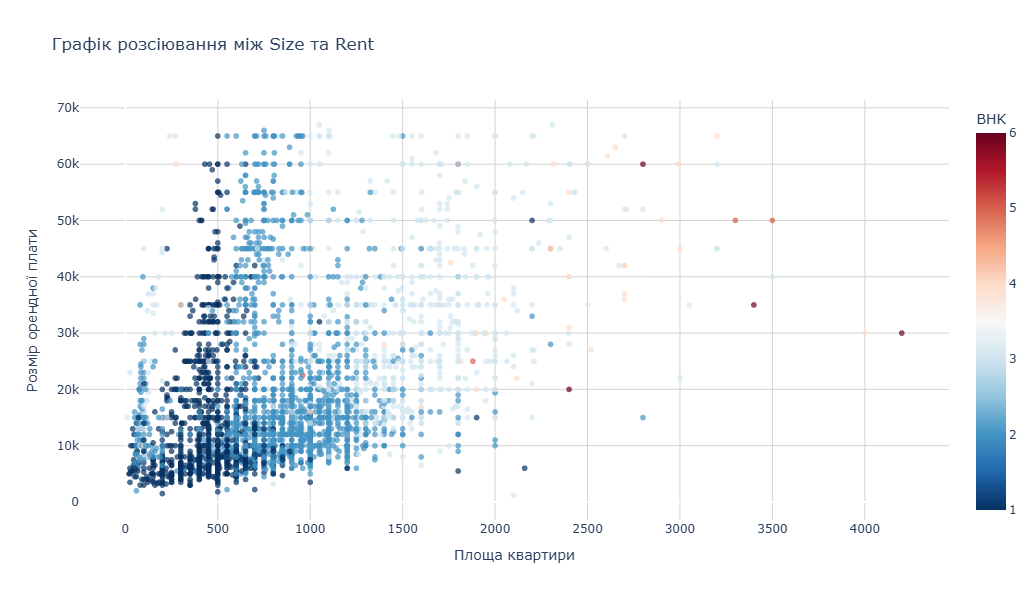

In [15]:
# Scatter plot між Size та Rent
fig = px.scatter(
    data_clean, 
    x='Size', 
    y='Rent', 
    color='BHK',
    color_continuous_scale='RdBu_r',
    hover_data=['Bathroom'],        
    title='Графік розсіювання між Size та Rent',
    labels={'Size': 'Площа квартири', 'Rent': 'Розмір орендної плати'},
    opacity=0.7                
)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    height=600
)

fig.show()

**Висновок:**

Цей графік розсіювання наочно пояснює кореляцію між змінними *Rent* та *Size* - 0,39, яка була розрахована вище:

1. Вертикальні скупчення точок показують, що можуть бути квартири однакової площі, але діапазон ціни дуже великий як до 10 000, так і вище 60 000. Тобто, площа не головний показник ціноутворення. Висуваю гіпотезу, що скоріше в данному наборі даних на ціну квартири більше впливає її розташування (місто, район міста), тому і може бути так, що 1-кімнатна квартира в респектабельному або туристичному районі може бути дорожчою за квартиру з набагато більшою площею у промисловому або бідному районі.

2. Найяскравіші за кольором точки (найбільші за площею та за кількістю кімнат) - це квартири, які можуть коштувати в районі як 20 000, так і в районі 60 000. До речі, найдорожча квартира з великою площею, це та, де на 6 кімнат є 7 ванних. Це цікаво, можливо кількість ванних кімнат є сильнішим маркером преміальності або комфорту, ніж просто загальна площа.

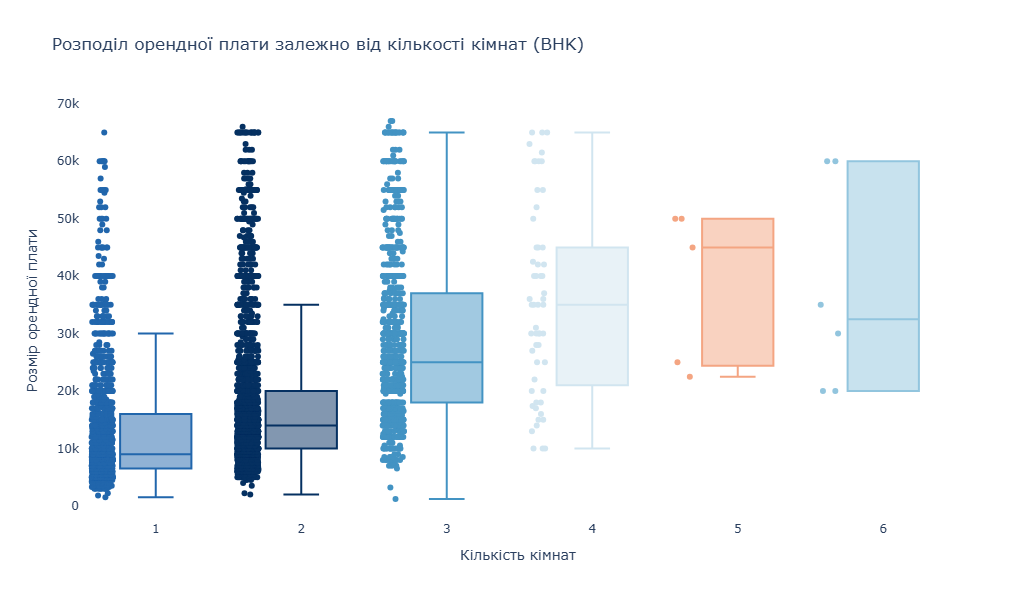

In [17]:
# Створюємо boxplot для кожної категорії BHK
colors = px.colors.sequential.RdBu_r
del colors[5]

fig_bhk = px.box(
    data_clean, 
    x='BHK', 
    y='Rent', 
    color='BHK',
    title='Розподіл орендної плати залежно від кількості кімнат (BHK)',
    labels={'BHK': 'Кількість кімнат', 'Rent': 'Розмір орендної плати'},
    color_discrete_sequence=colors,
    points="all"
)

fig_bhk.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    xaxis_title="Кількість кімнат",
    yaxis_title="Розмір орендної плати",
    height=600
)

fig_bhk.show()

**Висновок:**

Цей графік показує структуру ринку залежно від кількості кімнат:

Орендна плата зростає разом із кількістю кімнат: 1 і 2-кімнатні квартири мають більш стабільні ціни, найбільша варіативність цін спостерігається у 3 і 4-кімнатних квартир. Квартири з великою кількістю кімнат формують преміум-сегмент - в них порівняно з іншими вищі медіани. Але взагалі для категорій 5 та 6 BHK даних дуже мало. 

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


**Виходячи з аналізу категоріальних змінних, який я робила вище:**

1. Можна закодувати за допомогою One-Hot Encoding такі змінні:
- Area Type              - 3
- City                   - 6
- Furnishing Status      - 3
- Tenant Preferred       - 3
- Point of Contact       - 3

2. Також можна додати нові ознаки:

- Posted On - 3 ознаки: рік, місяць, день тижня, які були б корисними для оцінки часових патернів.
- Floor - витягнути поверх та загальну поверховість будинку, а на їх основі створити корисну метрику відносної поверховості квартири до висоти будинку.

3. Видалити колонки:
- Posted On і Floor - після вилучення нових ознак.
- Area Locality - через велику кількість різних категоріальних значень.

In [18]:
# Нові ознаки з дати
data_clean['Posted On'] = pd.to_datetime(data_clean['Posted On'])
data_clean['Year'] = data_clean['Posted On'].dt.year
data_clean['Month'] = data_clean['Posted On'].dt.month
data_clean['DayOfWeek'] = data_clean['Posted On'].dt.dayofweek

# Нові ознаки поверховості
def extract_floor_info(value):
    try:
        parts = value.split(' out of ')
        current = 0 if parts[0].strip().lower() == 'ground' else int(parts[0])
        total = int(parts[1])
        return current, total
    except:
        return np.nan, np.nan

data_clean[['CurrentFloor', 'TotalFloors']] = data_clean['Floor'].apply(
    lambda x: pd.Series(extract_floor_info(x))
)

data_clean[['CurrentFloor', 'TotalFloors']] = data_clean[['CurrentFloor', 'TotalFloors']].astype('Int64')

data_clean['RelativeFloor'] = data_clean['CurrentFloor'] / data_clean['TotalFloors']

# One-Hot кодування
categorical_cols = ['Area Type', 'City', 'Furnishing Status',
                    'Tenant Preferred', 'Point of Contact']

data_clean = pd.get_dummies(data_clean, columns=categorical_cols, drop_first=True)

# Видаляємо непотрібні колонки
data_clean = data_clean.drop(columns=['Area Locality', 'Floor', 'Posted On'])

data_clean.head(5)

,BHK,Rent,Size,Bathroom,Year,Month,DayOfWeek,CurrentFloor,TotalFloors,RelativeFloor,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,2022,5,2,0,2,0.0,...,False,False,True,False,False,True,True,False,False,True
1,2,20000,800,1,2022,5,4,1,3,0.333333,...,False,False,True,False,True,False,True,False,False,True
2,2,17000,1000,1,2022,5,0,1,3,0.333333,...,False,False,True,False,True,False,True,False,False,True
3,2,10000,800,1,2022,7,0,1,2,0.5,...,False,False,True,False,False,True,True,False,False,True
4,2,7500,850,1,2022,5,0,1,2,0.5,...,False,False,True,False,False,True,False,False,False,True


Так як я закодувала колонки з опцією drop_first=True, це прибрало першу колонку (еталонну колонку) в кожній категорії закодованих колонок - міст в таблиці стало 5, а не 6, типів площі 2, а не 3 і т.п. Але для лінійної регресії це обов'язково, бо це забезпечує математичну стійкість моделі і виключає її мультиколінеарність.

In [19]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4226 entries, 0 to 4745
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4226 non-null   int64  
 1   Rent                               4226 non-null   int64  
 2   Size                               4226 non-null   int64  
 3   Bathroom                           4226 non-null   int64  
 4   Year                               4226 non-null   int32  
 5   Month                              4226 non-null   int32  
 6   DayOfWeek                          4226 non-null   int32  
 7   CurrentFloor                       4194 non-null   Int64  
 8   TotalFloors                        4194 non-null   Int64  
 9   RelativeFloor                      4194 non-null   Float64
 10  Area Type_Carpet Area              4226 non-null   bool   
 11  Area Type_Super Area               4226 non-null   bool   
 1

**Так як код не розпізнав деякі значення в таблиці, новостворені колонки *CurrentFloor, TotalFloors, RelativeFloor* мають менше значень - 4194 non-null, ніж інші - 4226 non-null, тобто там є пропуски, і далі лінійна регресія не буде працювати з такими значеннями NaN.
Тому не видалятиму дані, а зроблю їх заповнення.**

In [20]:
from sklearn.impute import SimpleImputer

# Визначення X (ознак) та y (ціль)
X = data_clean.drop(columns=['Rent'])    # Ознаки
y = data_clean['Rent']                   # Цільова змінна

# Імпутація пропущених значень
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Перетворюємо назад у DataFrame з тими ж назвами колонок
X = pd.DataFrame(X_imputed, columns=X.columns)

# Перевірка пропусків
missing_data = X.isnull().sum()
missing_percent = (missing_data / len(X)) * 100
print(missing_percent)

BHK                                  0.0
Size                                 0.0
Bathroom                             0.0
Year                                 0.0
Month                                0.0
DayOfWeek                            0.0
CurrentFloor                         0.0
TotalFloors                          0.0
RelativeFloor                        0.0
Area Type_Carpet Area                0.0
Area Type_Super Area                 0.0
City_Chennai                         0.0
City_Delhi                           0.0
City_Hyderabad                       0.0
City_Kolkata                         0.0
City_Mumbai                          0.0
Furnishing Status_Semi-Furnished     0.0
Furnishing Status_Unfurnished        0.0
Tenant Preferred_Bachelors/Family    0.0
Tenant Preferred_Family              0.0
Point of Contact_Contact Builder     0.0
Point of Contact_Contact Owner       0.0
dtype: float64


In [21]:
from sklearn.preprocessing import StandardScaler

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [22]:
from sklearn.model_selection import train_test_split

# Розділення даних на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

# Створення моделі та її навчання
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 2511.68
Size: 3836.89
Bathroom: 1694.36
Year: -0.00
Month: 203.55
DayOfWeek: 217.97
CurrentFloor: -284.58
TotalFloors: 1924.12
RelativeFloor: 134.33
Area Type_Carpet Area: -801.83
Area Type_Super Area: -928.15
City_Chennai: -468.46
City_Delhi: 732.07
City_Hyderabad: -1045.28
City_Kolkata: -950.58
City_Mumbai: 5752.36
Furnishing Status_Semi-Furnished: -1701.54
Furnishing Status_Unfurnished: -2196.60
Tenant Preferred_Bachelors/Family: -290.83
Tenant Preferred_Family: -697.43
Point of Contact_Contact Builder: -76.56
Point of Contact_Contact Owner: -3395.81

Зміщення (intercept): 19319.57


**Висновки:**

Дві ознаки, які найбільше впливають на прогноз орендної плати:
- City_Mumbai: 5752.36 - найбільший позитивний вплив - якщо квартира в Мумбаї, оренда в середньому на 5752 більше, ніж у базовому місті.
- Size: 3836.89 - другий за величиною позитивний вплив. Збільшення площі на 1 одиницю додає 3837 до орендної плати.

Найбільші негативні коефіцієнти:
- Point of Contact_Contact Owner: -3395.81 - якщо контактна особа - власник, то оренда в середньому на 3396 менша.
- Furnishing Status_Unfurnished: -2196.60 - немебльовані квартири коштують дешевше.
  
Доцільність додавання нової ознаки:

У цих даних вищий поверх сам по собі трохи знижує ціну CurrentFloor: -284.58 - коефіцієнт від'ємний, але висока загальна поверховість будинку TotalFloors: 1924.12 сильно її піднімає. Це означає, що люди цінують статусність високих будинків, але не обов'язково хочуть жити на самому верхньому поверсі.


In [25]:
# Прогнози на навчальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці (нові дані!)
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison = pd.DataFrame({
    'Реальна оренда': y_test.values[:10],
    'Прогнозована оренда': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})

print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальна оренда  Прогнозована оренда  Помилка
0           22000              28566.0  -6566.0
1            5000               3250.0   1750.0
2           37000              39168.0  -2168.0
3            8000               2911.0   5089.0
4           15000              15035.0    -35.0
5           20000              24094.0  -4094.0
6            8500              17061.0  -8561.0
7            7000               4237.0   2763.0
8            3000               1085.0   1915.0
9            8000               5994.0   2006.0


Загалом видно, що деколи модель дає відносно близькі результати, але на великих значеннях оренди частіше суттєво промахується.

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Метрики для тестової вибірки
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print("="*50)
print(f"\nMAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.3f}")

# Метрики для навчальної вибірки
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тренувальній вибірці):")
print("="*50)
print(f"\nMAE: {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):

MAE: 5379.32
RMSE: 7542.31
R²: 0.703
МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тренувальній вибірці):

MAE: 5442.90
RMSE: 7570.14
R²: 0.700


**Висновки:**

1. Метрики дуже схожі між train і test:
- Помилка на тренуванні та тесті майже однакова.
- Модель не переобучена і узагальнює дані адекватно.

2. R²= 0.703 на тестовій та  R²= 0.700 на тренуваній вибірках:
- Модель пояснює близько 70% варіації орендної плати.
- Це доволі хороший результат для цих даних, де є ще фактори, які тут не враховані, але можуть впливати (наприклад, близькість до туристичного центру, стан квартири та ін.).

3. MAE та RMSE
- Середня помилка і в тестовій, і в тренуваній вибірках близько 5 400, а середньоквадратична - 7 542.31 та 7 570.14 відповідно.
- Це означає, що модель у середньому помиляється на кілька тисяч, але іноді трапляються більші промахи (RMSE > MAE).


Модель працює стабільно, не переобучена, і дає адекватні прогнози (R²= 0.70). Проте точність ще можна було б покращити, якщо було б більше ознак (географія, інфраструктура, стан квартири) або використовувались інші алгоритми (Random Forest).

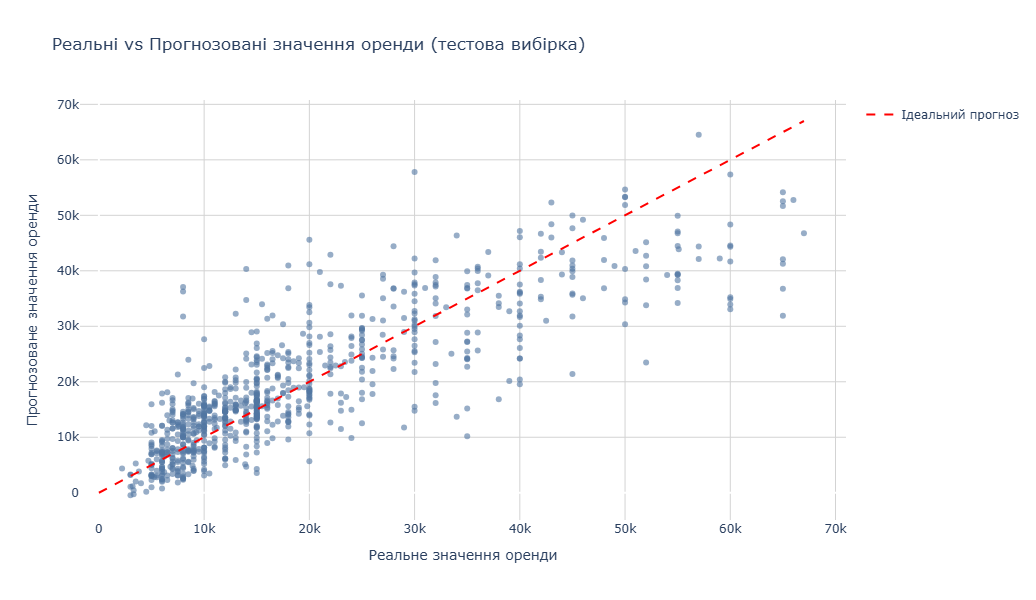

In [27]:
# Візуалізація: реальні vs прогнозовані значення
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальні vs Прогнозовані значення оренди (тестова вибірка)',
    labels={'x': 'Реальне значення оренди', 'y': 'Прогнозоване значення оренди'},
    color_discrete_sequence=['#5176A1'],
    opacity=0.6
)

# Додаємо ідеальну лінію (де прогноз = реальність)
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_traces(marker=dict(color='#5176A1'))

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    height=600
)

fig.show()

**Висновки:**

Графік демонструє очевидну лінійну залежність:

- Більшість точок зосереджена вздовж червоної пунктирної лінії «Ідеального прогнозу». Це означає, що модель вловила основний тренд ринку.

- Точність на низьких цінах: у діапазоні до 20 000 модель працює дуже стабільно.

- Розкид на високих цінах: чим вища реальна оренда (після 30 000), тим сильніше розлітаються точки. Тобто, дорогі квартири мають унікальні характеристики (стан квартири, видовість, престижність будинку), які неможливо повністю описати лише площею чи кількістю кімнат. Модель частіше їх недооцінює.

Ефективність нових ознак: 
- задяки виділенню *CurrentFloor* та *TotalFloors* модель розуміє різницю між квартирою на першому поверсі та видовою верхньою квартирою.
- створення *Month* та *DayOfWeek* врахувало сезонні коливання, хоча вони зазвичай мають менший вплив, ніж стандартні параметри об'єкта як Size і BHK.

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

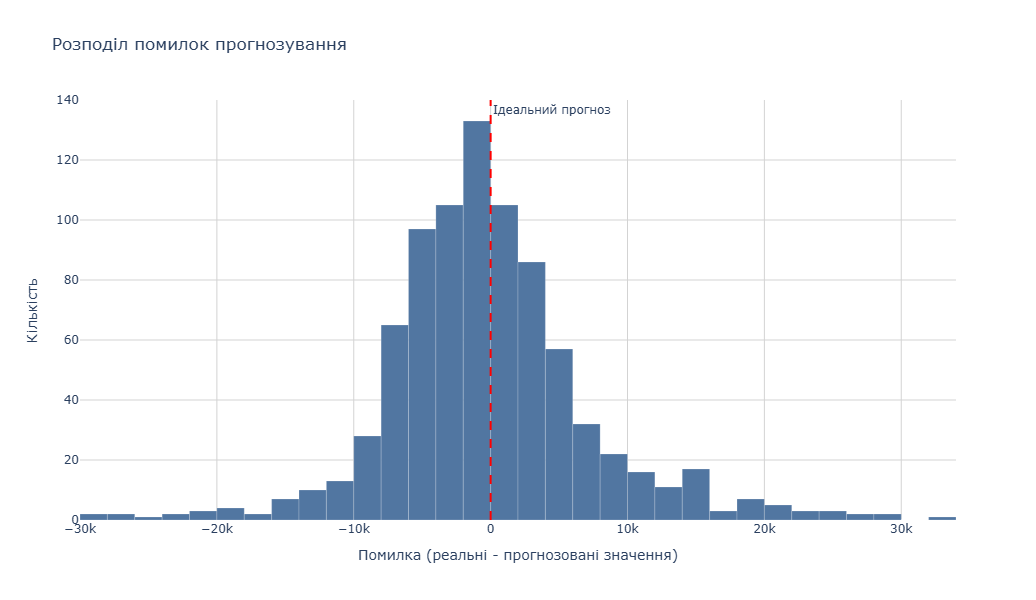

In [28]:
# Розраховуємо помилки
residuals = y_test - y_test_pred

# Гістограма помилок
fig = px.histogram(
    x=residuals,
    nbins=50,
    title='Розподіл помилок прогнозування',
    labels={'x': 'Помилка (реальні - прогнозовані значення)', 'count': 'Кількість'},
    color_discrete_sequence=['#5176A1']
)

fig.add_vline(x=0, line_dash='dash', line_color='red', annotation_text='Ідеальний прогноз')

fig.update_traces(marker_line_color='white', marker_line_width=0.2)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis_title='Кількість',
    height=600
)
fig.show()

Гістограма розподілу помилок має чітку форму дзвона (нормальний розподіл) із центром у нулі, що підтверджує правильність вибору методу лінійної регресії. Незважаючи на ідеальну центральну частину, графік має довгі хвости в обидва боки - випадки, де модель сильно переоцінила або недооцінила об'єкти.

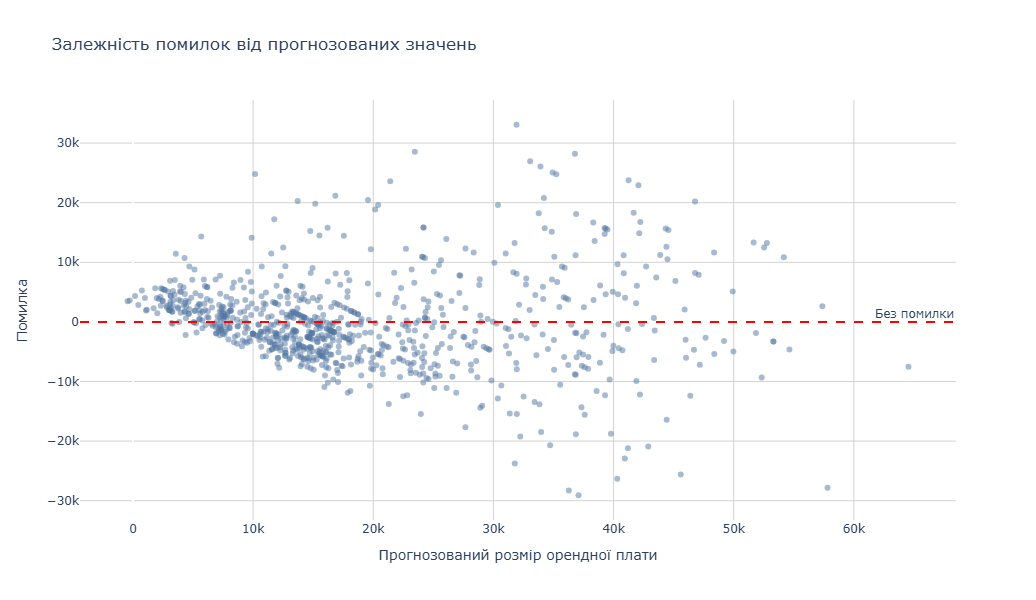

In [29]:
# Scatter plot помилок відносно прогнозованих значень
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозований розмір орендної плати', 'y': 'Помилка'},
    opacity=0.5
)


fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")

fig.update_traces(marker=dict(color='#5176A1'))

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    height=600
)
fig.show()

Як і на графіках вище, з цієї візуаліції видно, що модель гірше працює для великих значень - зі зростанням орендної плати точки більше розсіюються в воронку відносно контрольної лінії.

In [33]:
# Прогнози з найбільшими помилками
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')
top_errors[['predicted', 'error']] = top_errors[['predicted', 'error']].round(2)

print("Оренди з найбільшими помилками прогнозування:")
print(top_errors)

Оренди з найбільшими помилками прогнозування:
       real  predicted     error
3962  65000   31922.00  33078.00
549    8000   37086.92  29086.92
2512  52000   23457.27  28542.73
904    8000   36274.67  28274.67
3520  65000   36784.92  28215.08


Так як я перевіряла дані на наявність дублікатів на етапі ознайомлення з ними, то можливо це однакові квартири, але орендовані в різні дати. Інші ознаки в них скоріше за все співпадають, бо модель однаково помиляється на них в прогнозуванні і в них є якісь унікальні риси, опису яких немає в таблиці.

In [37]:
errors_df = pd.DataFrame({
    'BHK': X_test_original['BHK'].values,
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

# Повернення назви міста для кожного рядка (бо City було закодовано)
city_columns = [col for col in X_test_original.columns if col.startswith('City_')]

def get_city_name(row):
    for col in city_columns:
        if row[col] == 1:
            return col.replace('City_', '')
    return 'Bangalore' # Базове місто

errors_df['City'] = X_test_original.apply(get_city_name, axis=1)

error_analysis_bhk = errors_df.groupby('BHK')['error'].mean().sort_values(ascending=False).round(2)
error_analysis_city = errors_df.groupby('City')['error'].mean().sort_values(ascending=False).round(2)

print("Середня помилка (MAE) за кількістю кімнат")
print(error_analysis_bhk)
print("\nСередня помилка (MAE) за містами")
print(error_analysis_city)

Середня помилка (MAE) за кількістю кімнат
BHK
4.0    11839.26
3.0     7660.20
6.0     7129.95
2.0     4862.91
1.0     4372.38
5.0     3306.72
Name: error, dtype: float64

Середня помилка (MAE) за містами
City
Mumbai       6280.97
Hyderabad    5584.81
Kolkata      5176.30
Bangalore    4862.56
Chennai      3667.76
Name: error, dtype: float64


**Висновок:**

Модель працює відносно добре для малих та середніх квартир (1-2 кімнатних, з площею до 1000), але значно гірше прогнозує оренду для великих квартир (3+ кімнатних, з площею понад 2000). Це пояснюється тим, що ціни на великі квартири більш нестабільні й залежать від додаткових факторів (район, престижність будинку, інфраструктура, стан ремонту).

Модель демонструє надійну точність, проте її ефективність не є рівномірною. Найбільш впевнено алгоритм почувається в Chennai, тоді як у Mumbai похибка зростає майже вдвічі. Це вказує на те, що ринок Mumbai потребує додаткових ознак (наприклад, район або рік побудови) для підвищення точності.

**Рекомендації для поліпшення якісті моделі:**

- Додати ознаки: близькість центру, тип будинку, стан ремонту.
- Спробувати іншу модель, наприклад, Random Forest, яка краще працює з нелінійними залежностями.
- Створити окрему модель для квартир з великою площею, бо їхня поведінка на ринку відрізняється.